<h1><b>Laboratory work 3</b></h1>

<h3><b>Topic:</b> Using Pandas for Data Analysis</h3>

<h3><b>Goal: </b> Learning main Pandas features for data analysis. 
</h3>

<h3><center><b>Progress of work</b></center></h3>

In [3]:
print('Variant:' +  str(ord("D") % 5 + 1))

Variant:4


In [2]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   --------------- ------------------------ 4.5/11.5 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 23.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'NationalNames.csv')

<h5><b>Assignment 1: </b> Output the first 8 rows of the dataset.</h5>

In [3]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


<h5><b>Assignment 3: </b> Get the names of dataset columns.</h5>

In [4]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

<h5><b>Assignment 6: </b> Calculate the number of unique female and male names in whole dataset.</h5>

In [15]:
df.groupby(['Gender'])[['Name']].nunique()

,Name
Gender,
F,64911
M,39199


<h5><b>Assignment 7: </b> Find 5 the most popular male names in 2010.</h5>

In [19]:
df[(df['Gender'] == 'M') & (df['Year'] == 2010)].sort_values(by='Count', ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


<h5><b>Assignment 8: </b> Find the most popular name based on the results of one year (the name for which
Count is maximum).</h5>

In [30]:
def most_popular_name(year):
    most_popular = df[(df['Year'] == year)].sort_values(by='Count', ascending=False).head(1)
    print('The name is \'' + most_popular['Name'].values[0] + '\' in ' + str(year))

In [31]:
most_popular_name(2010)

The name is 'Isabella' in 2010


<h5><b>Assignment 13: </b> Find the year when the name “Jacob” was the most popular as a female name</h5>

In [33]:
df[(df['Gender'] == 'F') & (df['Name'] == 'Jacob')].sort_values(by='Count', ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


<h5><b>Assignment 14: </b> Find year, with the most number of gender neutral names (the same male and
female names)</h5>

In [6]:
gender_counts = df.groupby(['Year', 'Name'])['Gender'].nunique()

gender_neutral_names = gender_counts[gender_counts > 1]

gender_neutral_count_per_year = gender_neutral_names.groupby('Year').count()

most_gender_neutral_year = gender_neutral_count_per_year.idxmax()

pd.DataFrame({'Gender_neutral_names': [gender_neutral_count_per_year.max()]}, index=[most_gender_neutral_year])

,Gender_neutral_names
2008,2557


<h5><b>Assignment 15: </b> Find total births per year.</h5>

In [9]:
df.groupby(['Year']).agg({'Count':'sum'}).head(5)

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


<h5><b>Assignment 16: </b> Find the year when the greatest number of children was born.</h5>

In [24]:
print(df.groupby('Year')['Count'].sum().idxmax())

1957


<h5><b>Assignment 17: </b> Find the number of girls and boys that were born in each year.</h5>

In [65]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0).head(5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


<h5><b>Assignment 19: </b> Draw the plot of total births per year of boys and girls.</h5>

In [4]:
import matplotlib.pyplot as plt

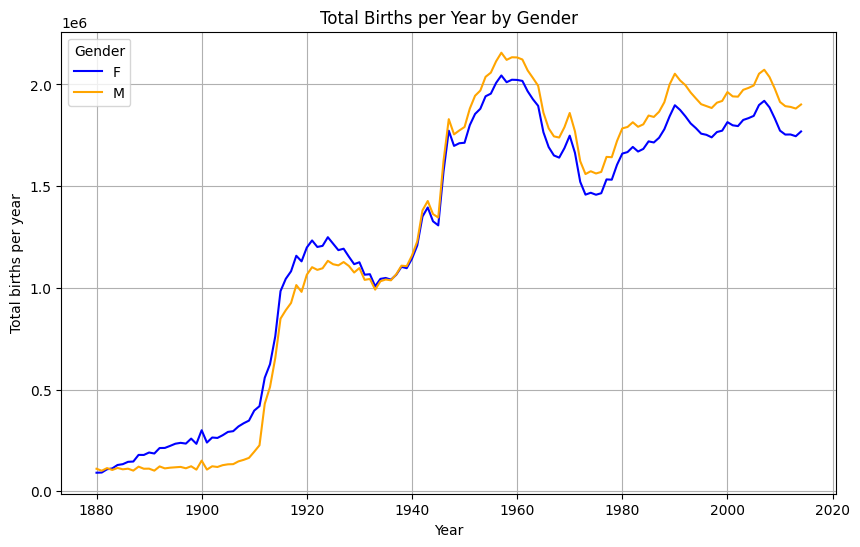

In [5]:
total_births_per_year = df.groupby(['Year', 'Gender'], as_index=False)['Count'].sum()

total_births_pivot = total_births_per_year.pivot(index='Year', columns='Gender', values='Count')

plt.figure(figsize=(10, 6))

plt.plot(total_births_pivot.index, total_births_pivot['F'], label='F', color='blue')
plt.plot(total_births_pivot.index, total_births_pivot['M'], label='M', color='orange')

plt.xlabel('Year')
plt.ylabel('Total births per year')
plt.title('Total Births per Year by Gender')

plt.legend(title='Gender')

plt.grid(True)
plt.show()

<h5><b>Assignment 20: </b> Count number of gender neutral names (same for girls and boys).</h5>

In [72]:
print(df.groupby('Name')['Gender'].nunique().eq(2).sum())

10221


<h5><b>Assignment 22: </b> Calculate how many years the observation was carried out.</h5>

In [31]:
print('The observation was carried out for ' + str(df['Year'].nunique()) + ' years')

The observation was carried out for 135 years


<h5><b>Assignment 24: </b> Find the most popular unpopular names (unpopular name that babies have been
called the most times).</h5>

In [114]:
unpopular_names = df[df['Count'] < 6].groupby('Name')['Count'].sum()

most_popular_unpopular_name = unpopular_names.idxmax()

most_popular_unpopular_count = unpopular_names.max()

print(f'Most popular unpopular name: {most_popular_unpopular_name} with count: {most_popular_unpopular_count}')

Most popular unpopular name: Celester with count: 160


<h5><b>Assignment 25: </b> Plot graphs of the distribution of the number of names “John” and “Mary” by
years, regardless of gender.</h5>

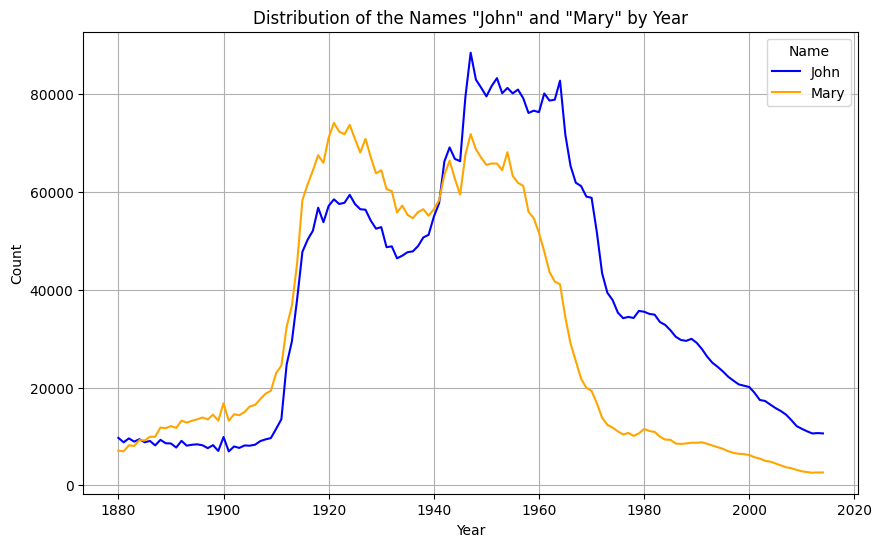

In [6]:
names_to_plot = df[df['Name'].isin(['John', 'Mary'])]

name_distribution = names_to_plot.groupby(['Year', 'Name'])['Count'].sum().unstack()

plt.figure(figsize=(10, 6))

plt.plot(name_distribution.index, name_distribution['John'], label='John', color='blue')
plt.plot(name_distribution.index, name_distribution['Mary'], label='Mary', color='orange')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of the Names "John" and "Mary" by Year')

plt.legend(title='Name')

plt.grid(True)
plt.show()

<h5><b>Assignment 26: </b> Plot graphs of the distribution of the number of female names “John” and male
names “Mary” by years.</h5s

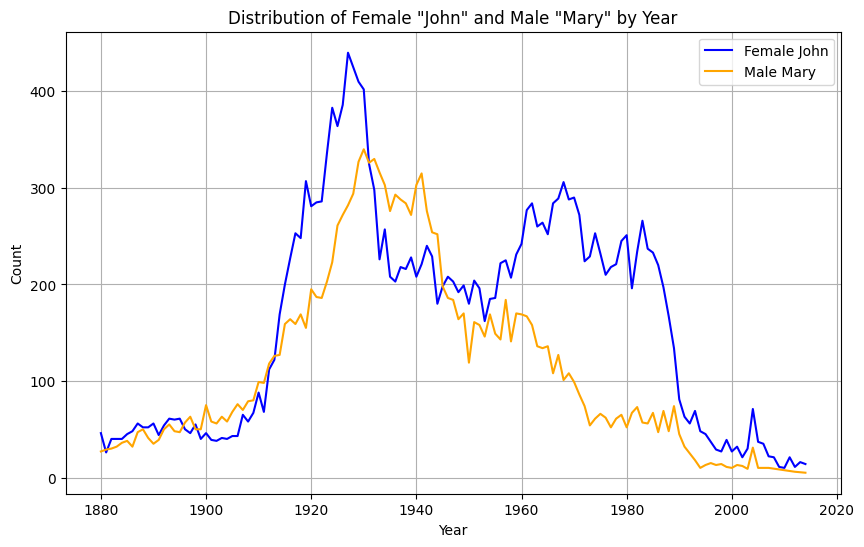

In [7]:
female_john = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
male_mary = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

female_john_by_year = female_john.groupby('Year')['Count'].sum()
male_mary_by_year = male_mary.groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))

plt.plot(female_john_by_year.index, female_john_by_year, label='Female John', color='blue')

plt.plot(male_mary_by_year.index, male_mary_by_year, label='Male Mary', color='orange')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Female "John" and Male "Mary" by Year')

plt.legend()

plt.grid(True)
plt.show()

<h5><b>Assignment 27: </b> Find the most popular names each year.</h5>

In [116]:
df.loc[df.groupby(['Year'])['Count'].idxmax(), ['Year', 'Name', 'Count']]

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147


<h4><b>Conclusion: </b> durnig this laboratory work i got to know how to work with pandas library, how to explore data from .csv files and how to create plots for specified data with set requirements for visualization.</h4>